In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import models.ssmrk3 as ssmrk
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# Parameters
abbr = "D02"


In [3]:
# Parameters
abbr = "M07"


In [4]:
preprocess(abbr)
pentzer_df, _ = ssmrk.ssmrk3_main(abbr)


M07 : Exported merged CSV in data/runs/M07/elec/M07_2022-09-12-15-08-14-GD-LinDump_elec_motor_data.csv
Primary topic : mcu_status


M07 : Exported merged CSV in data/runs/M07/merged/M07_2022-09-12-15-08-14-GD-LinDump_m.csv
M07 : Exported cut CSV in data/runs/M07/merged/M07_2022-09-12-15-08-14-GD-LinDump_mc.csv
Constant columns : 21
['/mcu/status/current_48v', '/warthog_velocity_controller/odom/position/z', '/warthog_velocity_controller/odom/orientation/x', '/warthog_velocity_controller/odom/orientation/y', '/warthog_velocity_controller/odom/orientation/roll', '/warthog_velocity_controller/odom/orientation/pitch', '/warthog_velocity_controller/odom/lin_twi/y', '/warthog_velocity_controller/odom/lin_twi/z', '/warthog_velocity_controller/odom/ang_twi/x', '/warthog_velocity_controller/odom/ang_twi/y', '/imu_and_wheel_odom/lin_twi/y', '/imu_and_wheel_odom/lin_twi/z', '/imu_and_wheel_odom/ang_twi/x', '/imu_and_wheel_odom/ang_twi/y', '/imu_and_wheel_odom/ang_twi/z', '/warthog_velocity_controller/cmd_vel/linear/x', '/warthog_velocity_controller/cmd_vel/linear/y', '/warthog_velocity_controller/cmd_vel/linear/z', '/warthog_v

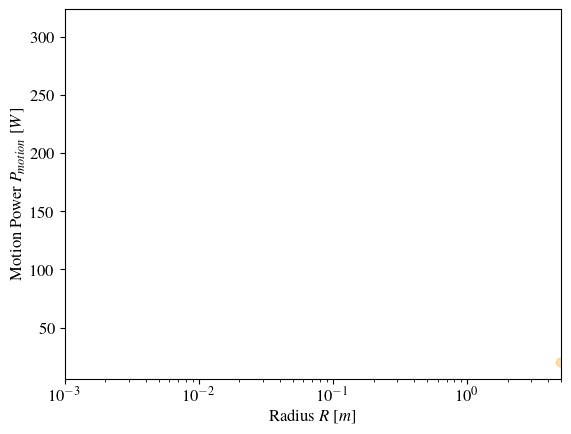

In [5]:
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename)
ssmrkgifs = figdir / "ssmrk"

R = pentzer_df.R.abs()
P = pentzer_df.P_motion

fig, ax = plt.subplots()
ax.plot(R, P, "o", color="xkcd:tangerine", alpha=0.3)
ax.set_xlabel("Radius $R$ [$m$]")
ax.set_ylabel(r"Motion Power $P_{motion}$ [$W$]")
ax.set_xscale("log")
ax.set_xlim(left=1e-3, right=min(5, R.max()))
fig.savefig(ssmrkgifs / f"{abbr}_powrad_short.jpg")

In [6]:
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename)
ssmrkgifs = figdir / "ssmrk"

R = pentzer_df.R.abs()
P = pentzer_df.P_motion

fig, ax = plt.subplots()
ax.plot(R, P, "o", color="xkcd:tangerine", alpha=0.3)
ax.set_xlabel("Radius $R$ [$m$]")
ax.set_ylabel(r"Motion Power $P_{motion}$ [$W$]")
ax.set_xlim(left=0, right=min(5, R.max()))
fig.savefig(ssmrkgifs / f"{abbr}_powrad_long.jpg")